# Modelos base(baseline)

In [41]:
import random
from random import choice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


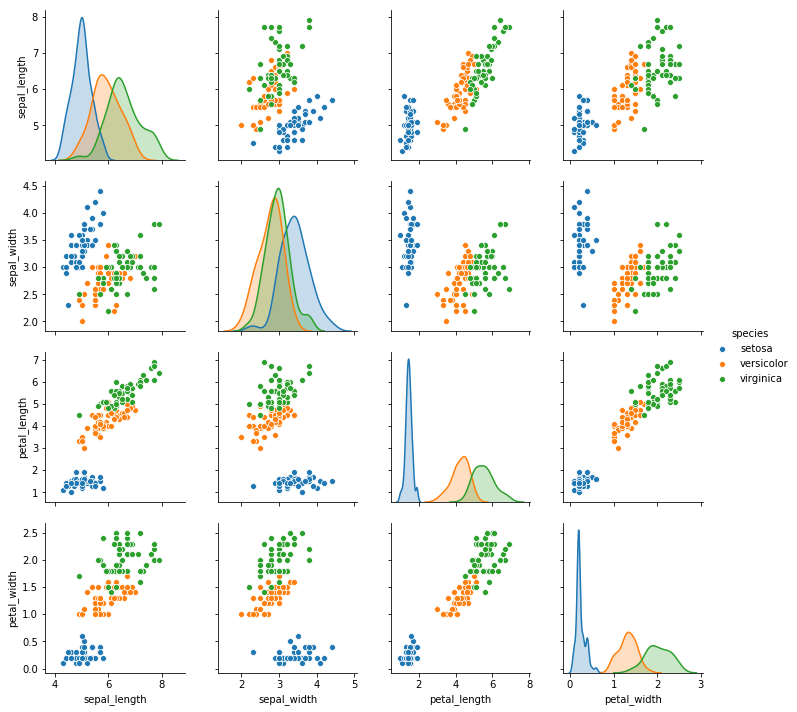

In [3]:
sns.pairplot(iris_df,hue='species')

In [4]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
def modelo_chango(instancia):
    return random.choice(['setosa','virginica','versicolor'])

In [6]:
instancias = iris_df.drop(columns=['species'])
iris_df['predichas']=[
    modelo_chango(instancia)
    for instancia in instancias.iterrows()
]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predichas
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,versicolor
2,4.7,3.2,1.3,0.2,setosa,versicolor
3,4.6,3.1,1.5,0.2,setosa,versicolor
4,5.0,3.6,1.4,0.2,setosa,setosa


In [7]:
100*np.mean(iris_df['species'] == iris_df['predichas'])

30.666666666666664

In [8]:
def modelo_a_ojo(instancia):
    petal_length = instancia['petal_length']
    if petal_length <= 2.5:
        return 'setosa'
    elif petal_length <= 4.6:
        return 'versicolor'
    elif petal_length <= 7:
        return 'virginica'
    else:
        return 'No existe la planta'

iris_df['predichas'] = [
    modelo_a_ojo(renglon)
    for indice,renglon in instancias.iterrows()
]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predichas
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [9]:
100*np.mean(iris_df['species'] == iris_df['predichas'])

92.0

In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
nhanes_df = pd.read_csv("Kaggle/nhanes.csv")

In [12]:
nhanes_df.corr()

,Gender,Age,Weight,Height,Leg_Length,Arm_Length,Arm_circum,Waist
Gender,1.000000,0.006785,0.275742,0.669364,0.503176,0.558865,0.159828,0.139936
Age,0.006785,1.000000,0.017480,-0.105107,-0.268362,0.053667,0.009340,0.227538
Weight,0.275742,0.017480,1.000000,0.442543,0.237047,0.584044,0.859518,0.891869
Height,0.669364,-0.105107,0.442543,1.000000,0.745212,0.799729,0.212407,0.181536
Leg_Length,0.503176,-0.268362,0.237047,0.745212,1.000000,0.612864,0.075998,-0.028937
Arm_Length,0.558865,0.053667,0.584044,0.799729,0.612864,1.000000,0.434724,0.401728
Arm_circum,0.159828,0.009340,0.859518,0.212407,0.075998,0.434724,1.000000,0.820541
Waist,0.139936,0.227538,0.891869,0.181536,-0.028937,0.401728,0.820541,1.000000


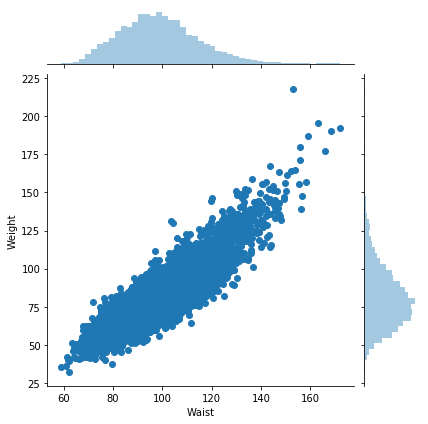

In [13]:
sns.jointplot(data=nhanes_df,x='Waist',y='Weight')

LinAlgError: SVD did not converge in Linear Least Squares

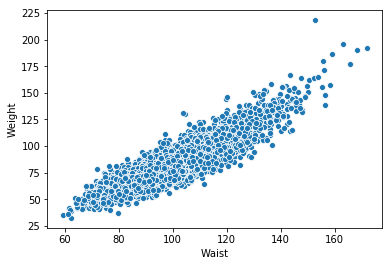

In [14]:
sns.scatterplot(data=nhanes_df,x='Waist',y='Weight')
df = nhanes_df.sample(400)
np.polyfit(x=(list(nhanes_df['Waist'])),y=(list(nhanes_df['Weight'])),deg=1)

In [ ]:
x_i = np.linspace(0,100)
y_i = (.5*x_i-0.1 + np.random.normal(0,5,size=len(x_i)))
y_i

In [ ]:
a,b = np.min(x_i)-1,np.max(x_i)+1
X = np.linspace(a,b)


In [15]:
list(zip(random.choices(list(zip(x_i,y_i)), k=n)))

NameError: name 'x_i' is not defined

In [16]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [17]:
import antigravity

In [18]:
n=len(x_i)
muestra_coef=[]
for k in range(400):
    muestra = random.choices(list(zip(x_i,y_i)), k=n)
    x_muestra,y_muestra = zip(*muestra)
    muestra_coef.append(np.polyfit(x_muestra,y_muestra,deg=1))

fig,ax=plt.subplots()

for coef in muestra_coef:
    p = np.poly1d(coef)
    plt.plot([0,100],[p[0],p[100]],alpha=.1,color='green')
    
ax.plot(x_i,y_i,'.')
ax.plot(X,polinomio(X),color='red')

NameError: name 'x_i' is not defined

In [ ]:
sns.regplot(x_i,y_i)

In [19]:
x = np.linspace(0,1)
y = np.linspace(0,1)
z = 2*x -3*y +1

In [20]:
X = np.array([[1,1],[1,2],[2,2],[2,3]])
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [21]:
# y = 1*x_0 +2*x_1 +3
y = np.dot(X,np.array([1,2]))+3+np.random.normal(size=len(X))
y

array([ 5.18592674,  7.34186595,  9.35039187, 12.63523947])

In [22]:
reg = LinearRegression().fit(X,y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
reg.score(X,y)

0.9894086041215963

In [24]:
reg.coef_

array([2.00852592, 2.7203934 ])

In [25]:
reg.intercept_

0.17478031574198205

In [26]:
reg.predict(np.array([[3,5]]))

array([19.80232511])

In [27]:
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [28]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [29]:
class Bunch:
    def __init__(self,**kwargs):
        self.__dict__=kwargs

In [30]:
b = Bunch(x=0,y=1)
b

In [31]:
b.x=0
b.y=1

In [32]:
class A:
    pass

In [33]:
a=A()
a.x='Hola'
a.y=1

In [34]:
a.__dict__

{'x': 'Hola', 'y': 1}

In [35]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [36]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [37]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [39]:
boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [40]:
boston_df['MEDV']=boston.target

In [41]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
regresor = linear_model.LinearRegression()

In [45]:
regresor.fit(boston_df.drop(columns=['MEDV']).values,boston_df['MEDV'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
regresor.intercept_

36.45948838509015

In [47]:
regresor.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [48]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.10801135783679423,
 'ZN': 0.04642045836688117,
 'INDUS': 0.020558626367069507,
 'CHAS': 2.6867338193449415,
 'NOX': -17.766611228299926,
 'RM': 3.809865206809223,
 'AGE': 0.0006922246403368467,
 'DIS': -1.4755668456002524,
 'RAD': 0.30604947898516904,
 'TAX': -0.012334593916573685,
 'PTRATIO': -0.9527472317072904,
 'B': 0.009311683273793581,
 'LSTAT': -0.5247583778554906}

In [49]:
regresorz = linear_model.LinearRegression(normalize=True)

In [50]:
regresorz.fit(boston_df.drop(columns=['MEDV']).values,boston_df['MEDV'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.10801135783679423,
 'ZN': 0.04642045836688117,
 'INDUS': 0.020558626367069507,
 'CHAS': 2.6867338193449415,
 'NOX': -17.766611228299926,
 'RM': 3.809865206809223,
 'AGE': 0.0006922246403368467,
 'DIS': -1.4755668456002524,
 'RAD': 0.30604947898516904,
 'TAX': -0.012334593916573685,
 'PTRATIO': -0.9527472317072904,
 'B': 0.009311683273793581,
 'LSTAT': -0.5247583778554906}

In [52]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(boston.data,boston.target,test_size=.2)

In [53]:
regresor=linear_model.LinearRegression(normalize=True)
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [54]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

4.127608502624167

In [55]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [2]:
tabla = pd.read_csv('TR_PERSONA17.CSV',encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [3]:
tabla.columns

Index(['ID_VIV', 'ID_PERSONA', 'ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC50K',
       'NOM_LOC', 'COBERTURA', 'ESTRATO', 'UPM', 'FACTOR', 'NUMPER', 'SEXO',
       'EDAD', 'PARENT', 'PARENT_OTRO_C', 'IDENT_MADRE', 'IDENT_PADRE',
       'SERSALUD', 'AFRODES', 'ACTA_NAC', 'DHSERSAL1', 'DHSERSAL2',
       'PERTE_INDIGENA', 'ENT_PAIS_NAC', 'NACIONALIDAD', 'HLENGUA',
       'QDIALECT_C', 'QDIALECT_INALI', 'HESPANOL', 'ELENGUA', 'ASISTEN',
       'MUN_ASI', 'NOM_MUN_ASI', 'ENT_PAIS_ASI', 'TIE_TRASLADO_ESCU',
       'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2', 'MED_TRASLADO_ESC3',
       'ESCOLARI', 'NIVACAD', 'ALFABET', 'ESCOACUM', 'MUN_RES10',
       'NOM_MUN_RES10', 'ENT_PAIS_RES10', 'SITUA_CONYUGAL', 'IDENT_PAREJA',
       'CONACT', 'OCUPACION_C', 'SITUACION_TRAB', 'AGUINALDO', 'VACACIONES',
       'SERVICIO_MEDICO', 'UTILIDADES', 'INCAP_SUELDO', 'SAR_AFORE',
       'CREDITO_VIVIENDA', 'INGTRMEN', 'ACTIVIDADES_C', 'MUN_TRAB',
       'NOM_MUN_TRAB', 'ENT_PAIS_TRAB', 'TIE_TRASLADO_TRAB',
       '

In [4]:
tabla_pr = tabla[['SEXO','EDAD','INGTRMEN','ESCOACUM']]
tabla_pr = tabla_pr.dropna()

In [5]:
tabla_pr.replace({'SEXO' : 3}, 0, inplace=True)
tabla_pr.head()

,SEXO,EDAD,INGTRMEN,ESCOACUM
0,1,30,10000.0,16.0
3,1,23,4286.0,9.0
4,0,24,4286.0,6.0
9,0,47,12857.0,9.0
11,1,41,857.0,9.0


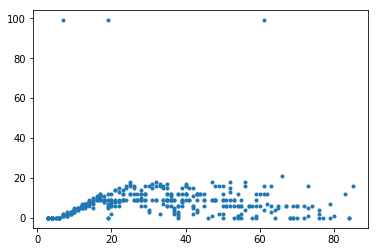

In [26]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['ESCOACUM'], marker='.', linestyle='none')

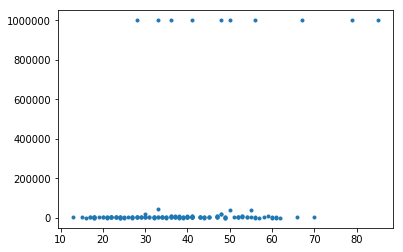

In [25]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['INGTRMEN'], marker='.', linestyle='none')

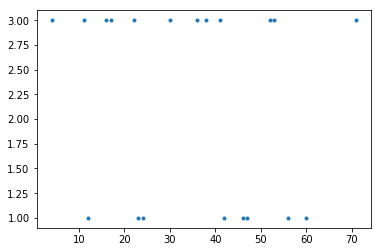

In [8]:
muestra = tabla.sample(20)
plt.plot(muestra['EDAD'], muestra['SEXO'], marker='.', linestyle='none')

In [28]:
tabla_pr1= tabla_pr[(tabla_pr['INGTRMEN']>0)&(tabla_pr['EDAD']<=100)
                    &(tabla_pr['INGTRMEN']<999_999)&(tabla_pr['ESCOACUM']>=0)
                    &(tabla_pr['ESCOACUM']<99)]

In [29]:
tabla_pr1.describe()

,SEXO,EDAD,INGTRMEN,ESCOACUM
count,125587.000000,125587.000000,125587.00000,125587.000000
mean,0.639389,38.387007,4823.73940,9.340871
std,0.480180,13.974581,5665.60969,4.301766
min,0.000000,12.000000,8.00000,0.000000
25%,0.000000,27.000000,2571.00000,6.000000
50%,1.000000,37.000000,3857.00000,9.000000
75%,1.000000,48.000000,5571.00000,12.000000
max,1.000000,99.000000,999998.00000,24.000000


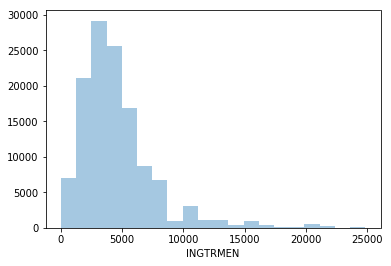

In [30]:
sns.distplot(tabla_pr1['INGTRMEN'][tabla_pr1['INGTRMEN']<25000],kde=False,bins=20)

In [32]:
tabla_pr1['LOGINGTRMEN']=np.log10(tabla_pr1['INGTRMEN'])
tabla_pr1.LOGINGTRMEN.describe()

/home/mario/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    125587.000000
mean          3.570912
std           0.310951
min           0.903090
25%           3.410102
50%           3.586250
75%           3.745933
max           5.999999
Name: LOGINGTRMEN, dtype: float64

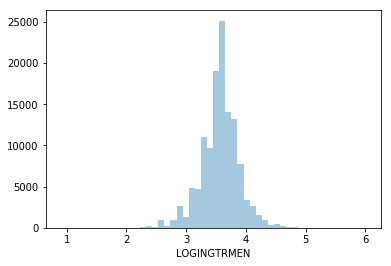

In [33]:
sns.distplot(tabla_pr1.LOGINGTRMEN,kde=False)

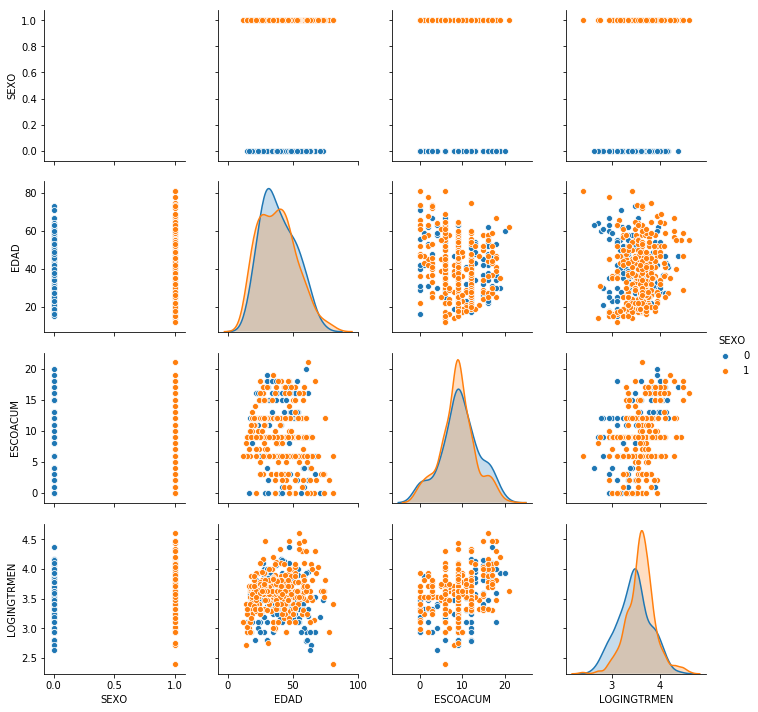

In [34]:
muestra=tabla_pr1.sample(500).drop(columns='INGTRMEN')
sns.pairplot(muestra,hue='SEXO')

In [15]:
muestra.corr()

,SEXO,EDAD,ESCOACUM,LOGINGTRMEN
SEXO,1.000000,-0.005210,-0.097961,0.184546
EDAD,-0.005210,1.000000,-0.212693,-0.043694
ESCOACUM,-0.097961,-0.212693,1.000000,0.363779
LOGINGTRMEN,0.184546,-0.043694,0.363779,1.000000


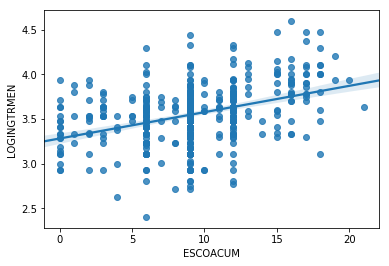

In [37]:
sns.regplot('ESCOACUM','LOGINGTRMEN',data=muestra)

In [71]:
regresor = linear_model.LinearRegression(normalize=True)

In [72]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.16552340775632737,
 'EDAD': 0.0033341622150027763,
 'ESCOACUM': 0.03287609565112612}

In [78]:
10**0.16552340775632737

1.4639404393995825

In [79]:
10**0.0033341622150027763

1.007706737413697

In [80]:
10**0.03287609565112612

1.0786389423060325

In [76]:
regresor.intercept_

3.015356139113413

In [81]:
1.463*(1.007**32)*(1.078**23)*1036

10660.52612555398

In [82]:
X_test = pd.DataFrame({'SEXO':[1,1,1],
             'EDAD':[32,24,22],
             'ESCOACUM':[23,18,16]})
y_pred = regresor.predict(X_test.values)
print(y_pred)

[4.04372294 3.85266916 3.78024865]


In [83]:
10**y_pred

array([11059.18028009,  7123.10197435,  6029.04667454])

In [77]:
10**regresor.intercept_

1035.991373441275

In [20]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(tabla_pr1,tabla_pr1['INGTRMEN'],test_size=.2)

In [21]:
regresor=linear_model.LinearRegression()
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
regresor.intercept_

-9.094947017729282e-13

In [23]:
regresor.coef_

array([-8.69971543e-12,  1.30702451e-14,  1.00000000e+00,  1.08676507e-15,
       -1.81705933e-13])

In [24]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l

5.888510069088606e-23

In [60]:
numeros = list(map(fractions.Fraction, ['0.0','5.3','7.2','8.6','10.0','1.3','3.3','8.2']))
print(numeros)

[Fraction(0, 1), Fraction(53, 10), Fraction(36, 5), Fraction(43, 5), Fraction(10, 1), Fraction(13, 10), Fraction(33, 10), Fraction(41, 5)]


In [61]:
suma = sum(numeros)

In [65]:
media = suma/len(numeros)
float(media)

5.4875

In [66]:
l=[]
for i in numeros:
    l.append(float(i-media))
l

[-5.4875, -0.1875, 1.7125, 3.1125, 4.5125, -4.1875, -2.1875, 2.7125]

In [64]:
suma1 = sum(l)
media=suma1/len(l)
media

Fraction(0, 1)

In [58]:
import fractions

In [59]:
fractions.Fraction('1.1')

Fraction(11, 10)